## Import dependencies

In [8]:
from src.bifurcation import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math

## Create Phase Portraits

Set some values to align with other previous tasks

In [9]:
t_0 = 0
t_end = 200

beta=11.5
A=20
d=0.1
nu=1
b=0.022
mu0 = 10      
mu1 = 10.45
y0 = [195.3, 0.052, 4.4]

Use bifurcation.py to call normal form based on approach of Lu and Huang to account for psychological effects

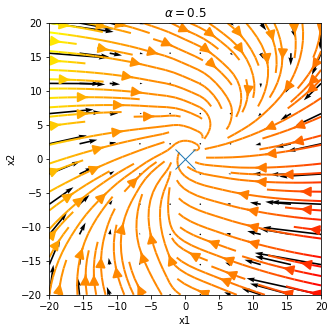

In [10]:
range_x=(-20, 20)
range_y=(-20, 20)
num_grid_points=10

alpha = 0.5

x, y = np.meshgrid(np.linspace(range_x[0], range_x[1], num_grid_points),np.linspace(range_y[0], range_y[1], num_grid_points))
u, v = np.zeros_like(x), np.zeros_like(y)

# Andronov_Hopf normal form
normalforms = normalform(x, y, alpha, mu0, mu1, b, y, d)
u = y + normalforms[0]
v = -x + normalforms[1]

plt.figure(figsize=(5, 5))
plt.streamplot(x, y, u, v, linewidth=2, arrowsize=2, color=u, cmap='autumn')
plt.quiver(x, y, u, v)
plt.plot(0, 0, marker="x", markersize=20)

plt.axis('square')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(r'$\alpha={0}$'.format(alpha))

plt.show()

Create various phase diagrams

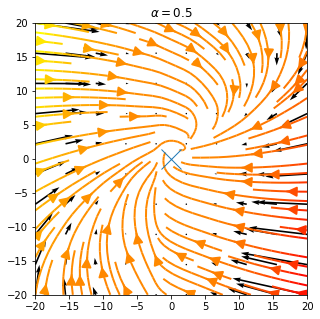

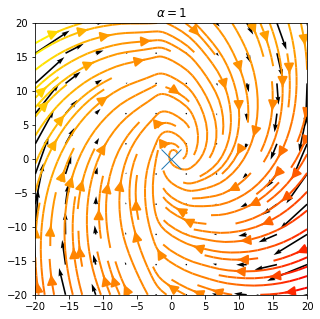

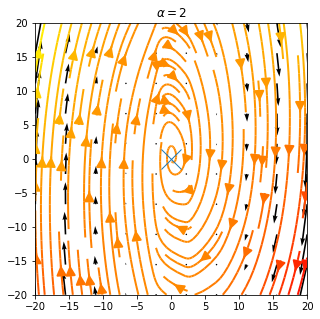

In [11]:
list_alpha = [0.5,1,2]
for alpha in list_alpha :  
    x, y = np.meshgrid(np.linspace(range_x[0], range_x[1], num_grid_points),np.linspace(range_y[0], range_y[1], num_grid_points))
    u, v = np.zeros_like(x), np.zeros_like(y)

    # Andronov_Hopf normal form
    normalforms = normalform(x, y, alpha, mu0, mu1, b, y, d)
    u = y + normalforms[0]
    v = -x + normalforms[1]
    
    # draw the plot
    fig1 = plt.figure(figsize=(5, 5))
    plt.streamplot(x, y, u, v, linewidth=2, arrowsize=2, color=u, cmap='autumn')
    plt.quiver(x, y, u, v)
    plt.plot(0, 0, marker="x", markersize=20)

    plt.axis('square')
    plt.title(r'$\alpha={0}$'.format(alpha))

    plt.show()